# CH1) LangChain 시작하기



### LangSmith 설정하기

In [1]:
from dotenv import load_dotenv

load_dotenv()


True

In [2]:
from langchain_teddynote import logging
logging.langsmith("langchain-study")

# logging.langsmith("langchain-study", set_enable=False) # langsmith 쓰지 않을때 끄는법


LangSmith 추적을 시작합니다.
[프로젝트명]
langchain-study


### 04. OPenAI API 사용(GPT-40 멀티모달)

In [ ]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    temperature=0.1, # 0 <- 정확성  창의성 -> 2
    model_name='gpt-4o'
)

question = "말레이시아의 수도는 어디인가요?"
response = llm.invoke(question)
print(f"[답변]: {response}")
print(f"[답변]: {response}")
print(type(response))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2891342050.py, line 5)

In [ ]:
response.content #'말레이시아의 수도는 쿠알라룸푸르입니다. 그러나 행정 수도는 푸트라자야로, 정부 기관들이 주로 위치해 있습니다.'
response.response_metadata

{'token_usage': {'completion_tokens': 36,
  'prompt_tokens': 17,
  'total_tokens': 53,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-2024-08-06',
 'system_fingerprint': 'fp_cbf1785567',
 'id': 'chatcmpl-CQZQ2BAI7unvM8mJa7MTnpmIqw61M',
 'service_tier': 'default',
 'finish_reason': 'stop',
 'logprobs': None}

In [ ]:
# LogProb 활성화

llm_with_logprob = ChatOpenAI(
    temperature=0.1,
    max_tokens=2048,
    model_name='gpt-3.5-turbo',
).bind(logprobs=True)

question = "대한민국의 수도는 어디인가요?"

response = llm_with_logprob.invoke(question)

response.response_metadata

#이 코드는 OpenAI 모델이 생성하는 각 토큰의 “로그 확률(Log Probability)”을 함께 출력하도록 설정하는 예시입니다.
#즉, 모델이 문장을 생성할 때 “각 단어(토큰)를 얼마나 확신 있게 예측했는지”를 수치로 볼 수 있게 하는 기능



{'token_usage': {'completion_tokens': 15,
  'prompt_tokens': 24,
  'total_tokens': 39,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-3.5-turbo-0125',
 'system_fingerprint': None,
 'id': 'chatcmpl-CQZQ4sFblKVTcitPLns4vQFvrMH6S',
 'service_tier': 'default',
 'finish_reason': 'stop',
 'logprobs': {'content': [{'token': '대',
    'bytes': [235, 140, 128],
    'logprob': -0.023170345,
    'top_logprobs': []},
   {'token': '한',
    'bytes': [237, 149, 156],
    'logprob': -1.9361265e-07,
    'top_logprobs': []},
   {'token': '\\xeb\\xaf',
    'bytes': [235, 175],
    'logprob': -1.9816675e-06,
    'top_logprobs': []},
   {'token': '\\xbc', 'bytes': [188], 'logprob': 0.0, 'top_logprobs': []},
   {'token': '\\xea\\xb5',
    'bytes': [234, 181],
    'logprob': -6.704273e-07,
    'top_logprobs': []},
   {'t

In [ ]:
# 스트리밍 출력

answer = llm.stream("대한민국의 아름다운 관광지 10곳과 주소를 알려주세요")
print(type(answer))
for token in answer :  # <class 'langchain_core.messages.ai.AIMessageChunk'>
  print(token.content, end="", flush=True)

<class 'generator'>
대한민국에는 아름다운 관광지가 많이 있습니다. 아래는 그 중 10곳과 해당 주소입니다.

1. **경복궁**
   - 주소: 서울특별시 종로구 사직로 161

2. **부산 해운대 해수욕장**
   - 주소: 부산광역시 해운대구 우동

3. **제주도 한라산 국립공원**
   - 주소: 제주특별자치도 제주시 1100로

4. **경주 불국사**
   - 주소: 경상북도 경주시 불국로 385

5. **전주 한옥마을**
   - 주소: 전라북도 전주시 완산구 기린대로 99

6. **설악산 국립공원**
   - 주소: 강원도 속초시 설악산로

7. **남이섬**
   - 주소: 강원도 춘천시 남산면 남이섬길 1

8. **안동 하회마을**
   - 주소: 경상북도 안동시 풍천면 전서로 186

9. **서울 남산타워 (N서울타워)**
   - 주소: 서울특별시 용산구 남산공원길 105

10. **순천만 습지**
    - 주소: 전라남도 순천시 순천만길 513-25

각 관광지는 고유의 매력을 가지고 있으며, 방문 시 다양한 문화와 자연을 경험할 수 있습니다.

In [ ]:
from langchain_teddynote.messages import stream_response

answer = llm.stream("대한민국의 아름다운 관광지 10곳과 주소를 알려주세요!")
stream_response(answer)


대한민국에는 아름다운 관광지가 많이 있습니다. 아래는 그 중 10곳과 해당 주소입니다.

1. **경복궁**
   - 주소: 서울특별시 종로구 사직로 161

2. **부산 해운대 해수욕장**
   - 주소: 부산광역시 해운대구 우동

3. **제주도 한라산 국립공원**
   - 주소: 제주특별자치도 제주시 1100로

4. **경주 불국사**
   - 주소: 경상북도 경주시 불국로 385

5. **설악산 국립공원**
   - 주소: 강원도 속초시 설악산로

6. **전주 한옥마을**
   - 주소: 전라북도 전주시 완산구 기린대로 99

7. **남이섬**
   - 주소: 강원도 춘천시 남산면 남이섬길 1

8. **인천 차이나타운**
   - 주소: 인천광역시 중구 차이나타운로59번길 20

9. **안동 하회마을**
   - 주소: 경상북도 안동시 풍천면 전서로 186

10. **서울 남산타워 (N서울타워)**
    - 주소: 서울특별시 용산구 남산공원길 105

이곳들은 각각 독특한 매력을 가지고 있어 방문할 가치가 충분합니다. 여행 계획에 참고하시기 바랍니다!


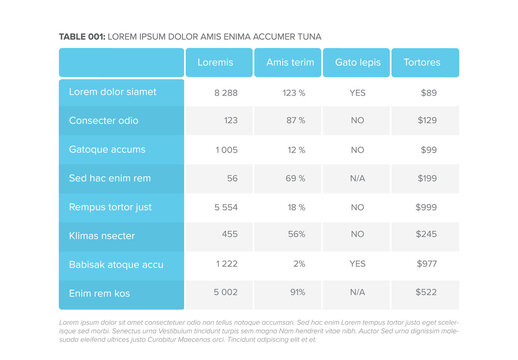

The image is a table with a header labeled "TABLE 001: LOREM IPSUM DOLOR AMIS ENIMA ACCUMER TUNA." It contains several columns and rows filled with placeholder text and numerical data. Here's a breakdown:

### Columns:
1. **Loremis**: Contains numerical values.
2. **Amis terim**: Contains percentages.
3. **Gáto lepis**: Contains "YES," "NO," or "N/A."
4. **Tortores**: Contains currency values in dollars.

### Rows:
- Each row has a label with placeholder text (e.g., "Lorem dolor siamet," "Consecter odio").
- The data in the rows corresponds to the columns, providing a mix of numbers, percentages, binary options, and dollar amounts.

### Footer:
- Contains additional placeholder text, likely serving as a note or explanation for the table.

The table seems to be a mock-up or template, using "Lorem Ipsum" text commonly used in design to fill space and demonstrate layout.

In [ ]:
from langchain_teddynote.models import MultiModal
from langchain_teddynote.messages import stream_response

llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-4o",  # 모델명
)

# 멀티모달 객체 생성
multimodal_llm = MultiModal(llm)

# 샘플 이미지 주소(웹사이트로 부터 바로 인식)
IMAGE_URL = "https://t3.ftcdn.net/jpg/03/77/33/96/360_F_377339633_Rtv9I77sSmSNcev8bEcnVxTHrXB4nRJ5.jpg"

# 이미지 파일로 부터 질의
answer = multimodal_llm.stream(IMAGE_URL)
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)


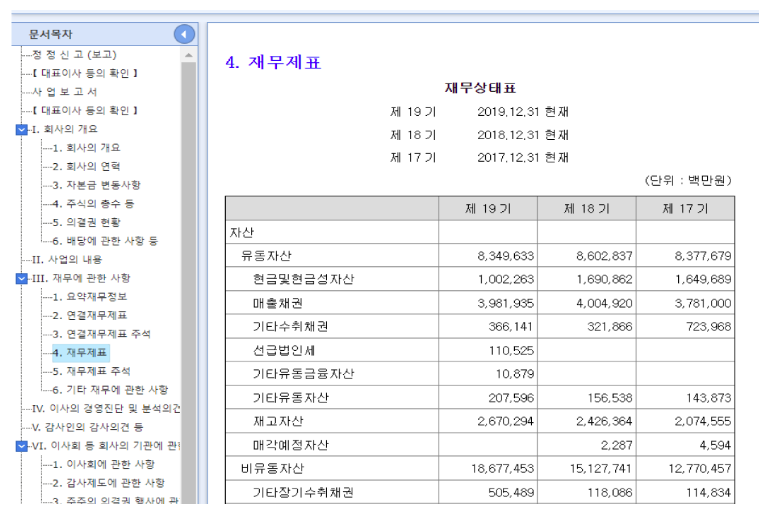

주어진 재무제표에서 몇 가지 흥미로운 사실을 정리해보겠습니다.

1. **유동자산의 변화**:
   - 제 19기(2019년)에는 유동자산이 8,349,633백만원으로, 제 18기(2018년) 대비 소폭 증가했습니다. 이는 현금 및 현금성 자산의 감소에도 불구하고 매출채권의 증가가 주요 원인입니다.

2. **현금 및 현금성 자산**:
   - 제 19기에는 1,002,263백만원으로, 전년도 대비 크게 감소했습니다. 이는 회사의 유동성 관리에 주의가 필요함을 시사합니다.

3. **매출채권**:
   - 제 19기에는 3,911,935백만원으로, 전년도 대비 증가했습니다. 이는 매출 증가 또는 회수 지연을 의미할 수 있습니다.

4. **기타유동금융자산**:
   - 제 19기에는 10,879백만원으로, 전년도와 동일합니다. 이는 해당 항목에서 큰 변화가 없음을 나타냅니다.

5. **비유동자산의 증가**:
   - 제 19기에는 18,677,453백만원으로, 전년도 대비 증가했습니다. 이는 장기적인 투자나 자산 취득이 있었음을 나타낼 수 있습니다.

6. **기타장기수취채권**:
   - 제 19기에는 505,489백만원으로, 전년도 대비 크게 증가했습니다. 이는 장기적인 채권 회수 계획이 필요함을 시사합니다.

이러한 변화들은 회사의 재무 상태와 운영 전략에 대한 중요한 정보를 제공하며, 추가적인 분석이 필요할 수 있습니다.

In [ ]:
# system , user 프롬프트 수정

system_prompt = """당신은 표(재무제표) 를 해석하는 금융 AI 어시스턴트 입니다. 
당신의 임무는 주어진 테이블 형식의 재무제표를 바탕으로 흥미로운 사실을 정리하여 친절하게 답변하는 것입니다."""

user_prompt = """당신에게 주어진 표는 회사의 재무제표 입니다. 흥미로운 사실을 정리하여 답변하세요."""

# 멀티모달 객체 생성
multimodal_llm_with_prompt = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt)

# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "data/cpa_data.png"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm_with_prompt.stream(IMAGE_PATH_FROM_FILE)

# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)

In [ ]:
### 프롬프트 템플릿의 활용

In [ ]:
from langchain_teddynote.messages import stream_response  # 스트리밍 출력
from langchain_core.prompts import PromptTemplate

template = "{country}의 수도는 어디인가요?"

prompt_template = PromptTemplate.from_template(template)
prompt_template

prompt = prompt_template.format(country="대한민국")
prompt

prompt = prompt_template.format(country="미국")
prompt

from langchain_openai import ChatOpenAI

model = ChatOpenAI(
    model="gpt-3.5-turbo",
    max_tokens=2048,
    temperature=0.1,
)
model

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x17a18add0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x17a18b370>, root_client=<openai.OpenAI object at 0x17a189900>, root_async_client=<openai.AsyncOpenAI object at 0x17a18ae90>, temperature=0.1, model_kwargs={}, openai_api_key=SecretStr('**********'), max_tokens=2048)

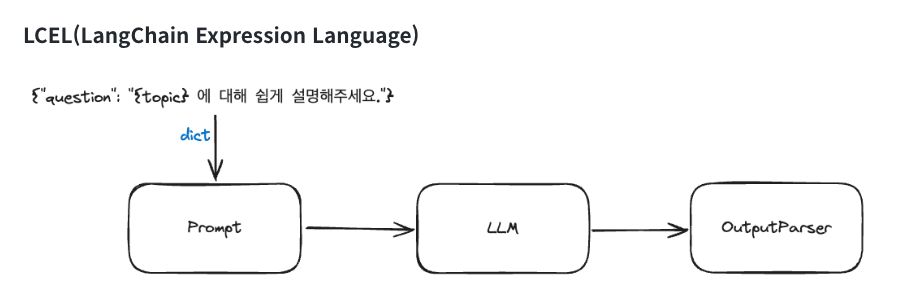

In [ ]:
# prompt 를 PromptTemplate 객체로 생성합니다.
prompt = PromptTemplate.from_template("{topic}에 대해 쉽게 설명해주세요.")
model = ChatOpenAI()
chain = prompt | model

input = {"topic" : "인공지능 모델의 학습 원리"} # 디렉토리

chain.invoke(input).content

# 스트리밍 출력을 위한 요청
answer = chain.stream(input)
# 스트리밍 출력
stream_response(answer)

인공지능 모델은 데이터를 입력하고 그 데이터에 따라서 스스로 학습하는 시스템입니다. 이 모델은 데이터를 받아들이고 그 데이터에서 패턴을 찾아내어 문제를 해결하는 능력을 갖게 됩니다. 

모델의 학습 과정은 크게 입력층, 은닉층, 출력층으로 구성됩니다. 입력층에는 데이터가 들어오고, 은닉층에서는 데이터의 패턴을 찾아내는 역할을 합니다. 이렇게 찾아낸 패턴은 출력층으로 전달되어 최종적인 결과물을 도출합니다.

모델은 입력받은 데이터와 실제 결과를 비교하면서 오차를 줄이는 방향으로 학습을 진행합니다. 이때 사용되는 알고리즘에는 다양한 종류가 있지만, 대표적으로 사용되는 것 중 하나는 역전파 알고리즘입니다. 이 알고리즘은 오차를 최소화하는 방향으로 가중치와 편향을 조정하면서 모델을 업데이트해 나갑니다.

이러한 과정을 반복하면 모델은 계속해서 데이터를 학습하고 정확도를 높여가며 최종적으로 원하는 작업을 수행할 수 있는 능력을 갖게 됩니다.

In [ ]:
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()

chain = prompt | model | output_parser

# chain 객체의 invoke 메서드를 사용하여 input을 전달합니다.
input = {"topic": "인공지능 모델의 학습 원리"}
chain.invoke(input)



'인공지능 모델의 학습 원리는 데이터를 입력으로 받아서 패턴을 학습하고 이를 기반으로 예측이나 결정을 내리는 과정입니다. 일반적으로 인공지능 모델은 다음과 같은 과정을 거쳐 학습을 진행합니다.\n\n1. 데이터 수집: 우선 인공지능 모델을 학습시키기 위한 다양한 데이터를 수집합니다.\n\n2. 데이터 전처리: 수집한 데이터를 정제하고 필요한 형태로 가공합니다.\n\n3. 모델 선택: 어떤 종류의 모델을 사용할지 선택하고 모델의 구조를 정의합니다.\n\n4. 학습: 정의한 모델에 데이터를 입력으로 주고, 입력 데이터와 정답 데이터 간의 오차를 최소화하는 방향으로 가중치를 조정하며 모델을 학습시킵니다.\n\n5. 평가: 학습된 모델의 성능을 평가하고, 필요하다면 모델을 수정하거나 재학습시킵니다.\n\n이러한 과정을 반복하여 모델을 세밀하게 튜닝하고 정확도를 높여가는 것이 인공지능 모델의 학습 원리입니다.'

In [ ]:
# 템플릿을 변경하여 적용

template = """
당신은 영어를 가르치는 10년차 영어 선생님입니다. 상황에 [FORMAT]에 영어 회화를 작성해 주세요.

상황:
{question}

FORMAT:
- 영어회화:
- 한글해석:
"""

prompt = PromptTemplate.from_template(template)
model = ChatOpenAI(model_name="gpt-4-turbo")
output_parser = StrOutputParser()

chain = prompt | model | output_parser

answer = chain.stream({"question": "저는 식당에 가서 음식을 주문하고 싶어요"})
stream_response(answer)


영어회화:  
"Hello, I'd like to order the grilled salmon with a side of mashed potatoes, please. And could I also have a glass of white wine? Thank you."

한글해석:  
"안녕하세요, 구운 연어에 마시 포테이토 사이드를 주문하고 싶어요. 그리고 화이트 와인 한 잔도 주실 수 있나요? 감사합니다."

In [ ]:
# 이번에는 question 을 '미국에서 피자 주문'으로 설정하여 실행합니다.
# 스트리밍 출력을 위한 요청
answer = chain.stream({"question": "미국에서 피자 주문"})
# 스트리밍 출력
stream_response(answer)

영어회화:
- Hello, I’d like to order a pizza for delivery, please.
- Sure, what would you like to order?
- Could I get a large pepperoni pizza with extra cheese?
- Anything else to add to your order?
- Yes, can you include 2 orders of garlic bread and a 2-liter bottle of Coke?
- Absolutely, that comes to $27.95. Can I have your address please?
- It’s 452 Elm Street, Apartment 2B.
- Great, your order will be there in about 30-40 minutes.
- Thank you!

한글해석:
- 안녕하세요, 배달로 피자 한 판 주문하고 싶습니다.
- 네, 무엇을 주문하시겠어요?
- 큰 사이즈 페퍼로니 피자에 치즈를 추가로 더 해주세요.
- 주문하실 다른 메뉴는 있으신가요?
- 네, 마늘빵 2개와 콜라 2리터도 함께 주시면 됩니다.
- 알겠습니다, 총 금액은 $27.95입니다. 주소를 알려주시겠어요?
- 452 엘름 스트리트, 아파트 2B입니다.
- 좋습니다, 대략 30-40분 내에 배달될 예정입니다.
- 감사합니다!

#### LCEL 인터페이스


In [ ]:
# API KEY를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()

# LangSmith 추적을 설정합니다. https://smith.langchain.com
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("langchain-study")

LangSmith 추적을 시작합니다.
[프로젝트명]
langchain-study


In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

model = ChatOpenAI()

prompt = PromptTemplate.from_template("{topic} 에 대하여 3문장으로 설명해줘")

chain = prompt | model | StrOutputParser()

for token in chain.stream({"topic": "멀티모달"}) :
  print(token, end="", flush=True)

SyntaxError: invalid syntax (3436238397.py, line 12)

In [ ]:
chain.invoke({"topic": "ChatGPT"}) # buffer 차면 한꺼번에

'ChatGPT는 대화형 인공지능 챗봇으로, 자연어 처리 기술을 활용하여 대화 상대와 상호작용합니다. 사용자의 질문에 대답을 제공하거나 대화를 이어가는 등 다양한 대화 기능을 수행합니다. ChatGPT는 자연스러운 대화를 통해 사용자에게 유용한 정보나 도움을 제공하는 데 활용됩니다.'

In [ ]:
chain.batch(
  [{"topic": "kubernetes"},{"topic": "langchain"}, {"topic":"langraph"},
   {"topic": "python"},{"topic": "c++"}, {"topic":"java"}
   ]
  ,
  config={"max_concurrency": 3}
  )

# return -> [str,str,str]

['Kubernetes는 컨테이너화된 애플리케이션을 자동화하고 관리하기 위한 오픈소스 플랫폼입니다. 다양한 클라우드 환경에서 사용되며 스케일링, 로드 밸런싱, 자가복구 등의 기능을 제공합니다. 쿠버네티스는 애플리케이션을 더 효율적이고 신속하게 배포하고 확장할 수 있도록 도와줍니다.',
 'Langchain은 보안 및 독점성이 확보된 블록체인 네트워크를 구축하는 플랫폼입니다. 이 플랫폼을 통해 기업이 안전하게 데이터를 저장하고 교류할 수 있으며, 이를 통해 효율적인 비즈니스 운영을 이룰 수 있습니다. 특히 언어 및 커뮤니케이션 분야에서의 활용이 강점으로 꼽힙니다.',
 'Langraph는 언어 이해 기술을 기반으로 하는 자연어 검색 및 분석 솔루션을 제공하는 기술 기업이다. 사용자가 원하는 정보를 효율적으로 찾을 수 있도록 다양한 자연어 처리 기술을 적용하여 검색 엔진 및 텍스트 마이닝 솔루션을 제공한다. Langraph의 솔루션은 다양한 분야에서 효율적인 정보 검색 및 분석을 지원하여 기업이나 조직의 업무 효율성을 높이는 데 기여한다.',
 '파이썬은 간단하고 쉽게 배울 수 있는 프로그래밍 언어입니다. Python은 다양한 분야에서 사용되며 커뮤니티가 활발하여 문제 해결에 도움을 받기 쉽습니다. 높은 가독성과 확장성을 갖춘 Python은 데이터 분석, 웹 개발, 인공지능 등 다양한 분야에서 인기를 얻고 있습니다.',
 'C++은 범용 프로그래밍 언어로, 강력하고 유연한 기능을 제공하여 다양한 종류의 소프트웨어를 개발할 수 있습니다. C++은 객체지향 및 절차지향 프로그래밍을 지원하며, 높은 성능과 효율성을 제공하여 시스템 프로그래밍이나 게임 개발 등에 널리 사용됩니다. 또한 C++은 많은 라이브러리와 프레임워크를 지원하여 개발 시간을 단축하고 코드의 재사용성을 높일 수 있습니다.',
 '자바는 객체지향 프로그래밍 언어로 개발자들이 다양한 플랫폼에서 사용할 수 있도록 만들어졌습니다. 자바는 자동 메모리 관리 및 다양한 라이브러리 지원으로 개발 생산성을 높이는데 

In [ ]:
print(type(chain)) # <class 'langchain_core.runnables.base.RunnableSequence'>

<class 'langchain_core.runnables.base.RunnableSequence'>


### 비동기의 이해

In [ ]:
import requests
import asyncio
from bs4 import BeautifulSoup
import time

s = time.time()
result = []

#-------------------A 파트 ---------------------

async def getpage(url) :
          loop = asyncio.get_running_loop()
          req = await loop.run_in_executor(None, requests.get, url)
          html = req.text
          soup = await loop.run_in_executor(None, BeautifulSoup, html, 'lxml')
          
          return soup

#-------------------B 파트 ---------------------

async def main() :
  
          urls = [
            "https://wp.me/p9x2w1-x",
            "https://wp.me/p9x2w1-w",
            "https://wp.me/p9x2w1-t",
            "https://wp.me/p9x2w1-q",
            "https://wp.me/p9x2w1-p",
            "https://wp.me/p9x2w1-j",
            "https://wp.me/p9x2w1-h",
          ]
          
          tasks = [asyncio.create_task(getpage(u)) for u in urls]
          r = await asyncio.gather(*tasks)
          global result
          result = r
  
  #-------------------C 파트 ---------------------
  
# loop = asyncio.get_event_loop()
# loop.run_until_complete(main())
# loop.close()
if __name__ == "__main__":
    # asyncio.run(main())  # 최신 방식
    await main() # jupyter 환경이라서 이렇게 실행
    e = time.time()
    print("{0:.2f}초 걸렸습니다".format(e - s))


21.33초 걸렸습니다


In [ ]:
def do_sync():
  pass

type(do_sync()) #NoneType

NoneType

In [ ]:
async def main_async() :
  await do_sync()
  
type(main_async()) # coroutine

/var/folders/qb/k2smljtx419g49xbkmv9zs700000gn/T/ipykernel_36231/1330890721.py:4: RuntimeWarning: coroutine 'main_async' was never awaited
  type(main_async()) # coroutine


coroutine

In [ ]:
import time

def find_users_sync(n) :
  for i in range(1, n+1) :
    print(f'{n}명 중 {i}번째 사용자 조회 중')
    time.sleep(1)
    
  print(f'> 총 {n}명 사용자 동기 조회 완료!')
  
  
def process_sync() :
  start = time.time()
  find_users_sync(3)
  find_users_sync(2)
  find_users_sync(1)
  end = time.time()
  print(f'>>>> 동기 처리 총 소요시간 :  {end - start}')
  
if __name__ == "__main__" :
  process_sync()

3명 중 1번째 사용자 조회 중
3명 중 2번째 사용자 조회 중
3명 중 3번째 사용자 조회 중
> 총 3명 사용자 동기 조회 완료!
2명 중 1번째 사용자 조회 중
2명 중 2번째 사용자 조회 중
> 총 2명 사용자 동기 조회 완료!
1명 중 1번째 사용자 조회 중
> 총 1명 사용자 동기 조회 완료!
>>>> 동기 처리 총 소요시간 :  6.023026943206787


In [ ]:
import time
import asyncio

async def find_users_sync(n) :
  for i in range(1, n+1) :
    print(f'{n}명 중 {i}번째 사용자 조회 중')
    await asyncio.sleep(1)
    
  print(f'> 총 {n}명 사용자 동기 조회 완료!')
  
  
async def process_async() :
    start = time.time()
    await asyncio.gather(
        find_users_sync(3),
        find_users_sync(2),
        find_users_sync(1),
    )
    
    end = time.time()
    print(f'>>>> 비동기 처리 총 소요시간 :  {end - start}')
  
# if __name__ == "__main__" :
#   asyncio.run(process_async())

await process_async()

3명 중 1번째 사용자 조회 중
2명 중 1번째 사용자 조회 중
1명 중 1번째 사용자 조회 중
3명 중 2번째 사용자 조회 중
2명 중 2번째 사용자 조회 중
> 총 1명 사용자 동기 조회 완료!
3명 중 3번째 사용자 조회 중
> 총 2명 사용자 동기 조회 완료!
> 총 3명 사용자 동기 조회 완료!
>>>> 비동기 처리 총 소요시간 :  3.0054101943969727


In [ ]:
import threading

def work():
    print("스레드 작업 중...")

t1 = threading.Thread(target=work)
t2 = threading.Thread(target=work)
t1.start()
t2.start()

스레드 작업 중...
스레드 작업 중...


### async stream : 비동기 스트림

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

model = ChatOpenAI()

prompt = PromptTemplate.from_template("{topic} 에 대하여 3문장으로 설명해줘")

chain = prompt | model | StrOutputParser()

for token in chain.stream("멀티모달") : # 값이 하나인경우 dict 형태 아니어도 된다.
  print(token, end="", flush=True)

멀티모달은 여러 종류의 다양한 매체와 기술을 조합하여 정보를 전달하고 상호작용하는 방법을 의미합니다. 이는 텍스트, 이미지, 비디오 및 음성 등 다양한 형태의 콘텐츠를 이용하여 사용자에게 다양한 경험을 제공할 수 있습니다. 멀티모달은 사용자들이 더 쉽게 정보를 이해하고 상호작용할 수 있도록 도와주는 중요한 디자인 요소입니다.

In [ ]:
chain.invoke("ChatGPT") # 한방에 나온다. cf) stream -> 실시간

'ChatGPT는 인공지능 채팅 모델로, 사용자와 자연스럽게 대화하며 정보나 답변을 제공합니다. 사용자의 질문에 따라 다양한 주제에 대한 지식을 제공하고 상호작용하는 데 활용됩니다. 데이터 학습과 기계학습 기술을 사용하여 문맥에 맞는 응답을 생성하며, 대화 상대로서 혁신적인 솔루션을 제공합니다.'

In [ ]:
chain.batch([{'topic': 'Google Germini'},{'topic': 'cursorAI'}])

['Google Germini은 구글의 광고 서비스를 관리하고 최적화하는 소프트웨어 플랫폼입니다. 이를 통해 사용자는 광고 예산을 관리하고 광고 성과를 추적할 수 있습니다. 더욱 효율적인 마케팅 전략을 구사할 수 있게 해주는 도구입니다.',
 'CursorAI는 인공지능 기반의 자동화 도구로써 효율적인 작업 처리를 지원합니다. 특히 데이터 분석이나 문서 작성과 같은 반복적인 작업을 자동화하여 업무 효율을 높일 수 있습니다. 또한 사용자의 작업 습관 및 패턴을 학습하여 보다 더 정확하고 효율적인 서비스를 제공합니다.']

In [ ]:
chain.batch(
    [
        {"topic": "ChatGPT"},
        {"topic": "Instagram"},
        {"topic": "멀티모달"},
        {"topic": "프로그래밍"},
        {"topic": "머신러닝"},
    ],
    config={"max_concurrency": 3},
)


['ChatGPT는 인공지능 챗봇으로 자연어 처리 기술을 사용하여 사람과의 대화를 모방합니다. 이를 통해 사용자는 ChatGPT를 통해 질문에 답변을 받거나 대화를 나눌 수 있습니다. ChatGPT는 학습을 통해 점차적으로 더 자연스러운 대화를 제공하며, 다양한 분야에서 활용될 수 있습니다.',
 'Instagram은 사진과 동영상을 공유하고 다른 사람들과 소통할 수 있는 소셜 미디어 플랫폼이다. \n\n사용자들은 해시태그를 활용하여 관심사에 맞는 콘텐츠를 발견하고 팔로잉을 통해 새로운 소식을 받아볼 수 있다.\n\n인플루언서와 브랜드들은 팔로워들에게 광고와 협찬을 통해 제품을 홍보하거나 소비자들과 소통하는데 활용되는 중요한 플랫폼이다.',
 '멀티모달은 여러 가지 다양한 형태의 정보를 결합하여 제공하는 시스템으로, 텍스트, 이미지, 동영상, 음성 등 다양한 형태의 자료를 활용해 사용자에게 정보를 전달합니다. 이를 통해 사용자는 보다 풍부하고 다채로운 경험을 할 수 있으며, 정보를 효과적으로 전달하고 수용할 수 있습니다. 다양한 매체를 활용하는 멀티모달은 현대 사회에서 정보 전달과 소통의 중요한 수단으로 활용되고 있습니다.',
 '프로그래밍은 컴퓨터에게 실행할 작업을 지시하는 일종의 커뮤니케이션 방법이다. 코드로 작성된 명령어들은 컴퓨터가 이해할 수 있는 형태로 변환되어 실행되며, 이를 통해 원하는 결과를 얻을 수 있다. 프로그래밍은 문제를 해결하고 새로운 기술을 개발하는 데에 중요한 역할을 한다.',
 '머신러닝은 데이터를 사용하여 컴퓨터가 스스로 학습하고 패턴을 발견하는 인공지능 기술이다. 이를 통해 머신러닝 모델은 예측, 분류, 군집화 등의 작업을 수행할 수 있으며, 다양한 분야에서 활용되고 있다. 머신러닝은 알고리즘의 향상과 데이터의 품질에 크게 의존하며, 지속적인 학습을 통해 성능을 개선할 수 있다.']

### async stream,invoke,batch: 비동기 스트림, 인보크, 배치

In [ ]:
async for token in chain.astream("Youtube") : 
  print(token, end="", flush=True)

Youtube는 온라인 동영상 플랫폼으로, 사용자들은 무료로 다양한 영상 콘텐츠를 시청할 수 있습니다. 또한 사용자들은 자신의 채널을 만들어 영상을 업로드하고 다른 사람들과 공유할 수도 있습니다. Youtube는 세계적으로 매우 인기 있는 서비스로, 각종 영상 콘텐츠를 쉽게 찾아볼 수 있는 편리한 검색 기능을 제공합니다.

In [ ]:
my_process = chain.ainvoke("NVIDIA")
await my_process

'NVIDIA는 그래픽 처리 장치 및 시스템을 개발하는 미국의 기업으로, 주로 게임용 그래픽카드와 인공지능 분야에서 높은 기술력을 가지고 있습니다. 주요 제품으로는 GeForce 그래픽카드와 Tesla GPU가 있으며, 다양한 산업 분야에서 활용되고 있습니다. NVIDIA는 그래픽카드 시장에서 세계적인 선두 기업으로 손꼽히며 혁신적인 기술과 제품을 개발하고 있습니다.'

In [ ]:
my_batch_process = chain.abatch(
  [{"topic": "YouTube"}, {"topic": "Instagram"}, {"topic": "Facebook"}]
)

await my_batch_process

['YouTube는 동영상을 업로드, 시청하고 공유할 수 있는 온라인 동영상 플랫폼이다. 사용자들은 다양한 콘텐츠를 즐길 수 있으며, 시청자들은 구독을 통해 자신이 좋아하는 채널을 지원할 수 있다. 또한 광고 수익을 통해 동영상 제작자들이 수익을 창출할 수 있는 플랫폼이기도 하다.',
 'Instagram은 사진과 동영상을 공유하는 소셜 미디어 플랫폼으로, 사용자들은 자신의 일상을 시각적으로 공유하고 소통할 수 있습니다. 해시태그를 활용하여 관심사에 맞는 컨텐츠를 찾을 수 있고, 팔로워들과 소통하며 커뮤니티를 형성할 수 있습니다. 인스타그램 스토리 기능을 통해 실시간으로 이야기를 공유하고, 흥미로운 순간을 담을 수 있습니다.',
 'Facebook은 사회관계망 서비스로서 전 세계적으로 가장 인기 있는 SNS 중 하나이다. 사용자들은 친구와 가족과 소통하고 콘텐츠를 공유하며 정보를 얻을 수 있다. 또한 광고 및 비즈니스 마케팅을 위한 플랫폼으로도 활발히 이용되고 있다.']

### 병렬성 (parallel)

In [ ]:
from langchain_core.runnables import RunnableParallel

# {county} 의 수도를 물어보는 체인을 생성합니다.

chain1 = (
  PromptTemplate.from_template("{country} 의 수도는 어디야?")
  | model
  | StrOutputParser()
)

# {county} 의 면적를 물어보는 체인을 생성합니다.

chain2 = (
  PromptTemplate.from_template("{country} 의 면적은 얼마야?")
  | model
  | StrOutputParser()
)

combined = RunnableParallel(capital= chain1, area= chain2)

print(type(chain1.invoke("대한민국")))
print(chain2.invoke("말레이시아"))

combined.invoke("대한민국") # -> dict #{'capital': '대한민국의 수도는 서울이다.', 'area': '대한민국의 면적은 약 100,363 제곱 킬로미터입니다.'}

<class 'str'>
말레이시아의 면적은 약 329,847제곱킬로미터입니다.


{'capital': '대한민국의 수도는 서울이다.', 'area': '대한민국의 면적은 약 100,363 제곱 킬로미터입니다.'}

### 배치에서의 병렬처리

In [ ]:
chain1.batch([{"country": "대한민국"}, {"country": "미국"}])


['대한민국의 수도는 서울입니다.', '미국의 수도는 워싱턴 D.C.입니다.']

In [ ]:
chain2.batch([{"country": "대한민국"}, {"country": "미국"}])

['대한민국의 총 면적은 약 100,363㎢ 입니다.', '미국의 면적은 약 9,834만 제곱 킬로미터 입니다.']

In [ ]:
combined.batch([{"country": "대한민국"}, {"country": "미국"}]) # -> List[dict]

[{'capital': '대한민국의 수도는 서울입니다.', 'area': '대한민국의 면적은 약 100,363km² 입니다.'},
 {'capital': '미국의 수도는 워싱턴 D.C.입니다.', 'area': '미국의 면적은 약 9,826,675 km² 입니다.'}]

### RunnablePassthrough

In [ ]:
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

# prompt 와 llm 을 생성합니다.
prompt = PromptTemplate.from_template("{num} 의 10배는?")
llm = ChatOpenAI(temperature=0)

# chain 을 생성합니다.
chain = prompt | llm

chain.invoke(5)

AIMessage(content='50입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 3, 'prompt_tokens': 16, 'total_tokens': 19, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CQQzccL9oeJ0nepVyJ7TQzdNrTLRE', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--4127fa3b-7278-497c-9505-a32c0c7f30be-0', usage_metadata={'input_tokens': 16, 'output_tokens': 3, 'total_tokens': 19, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
from langchain_core.runnables import RunnablePassthrough
RunnablePassthrough().invoke(10) # 항등함수처럼 작용. 즉 input data가 그대로 리턴ㅠ

10

In [ ]:
runnable_chain = {"num": RunnablePassthrough()} | prompt | ChatOpenAI()

runnable_chain.invoke(10) # ->AIMessage(content='100입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 3, 'prompt_tokens': 16, 'total_tokens': 19, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CQR3qPOUe6GABBwf8KEC3DkROk5dx', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--0e98c508-6825-4ab2-8ee6-1d88f6771813-0', usage_metadata={'input_tokens': 16, 'output_tokens': 3, 'total_tokens': 19, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})


AIMessage(content='100입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 3, 'prompt_tokens': 16, 'total_tokens': 19, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CQR3qPOUe6GABBwf8KEC3DkROk5dx', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--0e98c508-6825-4ab2-8ee6-1d88f6771813-0', usage_metadata={'input_tokens': 16, 'output_tokens': 3, 'total_tokens': 19, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
# runnalbepassthrough.assigh()

RunnablePassthrough().invoke('항등함수') # {'numb': 1}

'항등함수'

In [ ]:
(RunnablePassthrough.assign(new_num = lambda d : d["num"] * 3)).invoke({"num":1})

# invoke 의 매개변수는 항등함수로 작동
# 추가로 매개변수 값을 이용해서 dict에 값을 추가해서 리턴함

{'num': 1, 'new_num': 3}

In [ ]:
(RunnablePassthrough.assign(best_player = lambda d : d["soccerPlayer"][:3])).invoke({"soccerPlayer":"박지성손흥민"})

# {'soccerPlayer': '박지성손흥민', 'best_player': '박지성'}


{'soccerPlayer': '박지성손흥민', 'best_player': '박지성'}

### RunnableParallel

In [ ]:
from langchain_core.runnables import RunnableParallel

# 여러 인스턴스를 병렬로 실행한다.

runnable = RunnableParallel(
    passed = RunnablePassthrough(), # 입력된 인자를 그대로 통과시킨다.
    extra = RunnablePassthrough.assign(mult = lambda x: x["num"] * 3), #인자추가
    modified= lambda x: x["num"] +1,  # 입력된 딕셔너리 값에 해당값을 더한다.
)

runnable.invoke({"num": 1})

# {'passed': {'num': 1}, 'extra': {'num': 1, 'mult': 3}, 'modified': 2}

{'passed': {'num': 1}, 'extra': {'num': 1, 'mult': 3}, 'modified': 2}

In [ ]:
#

runnable = RunnableParallel(
    차범근 = RunnablePassthrough(), # 입력된 인자를 그대로 통과시킨다.
    박지성 = RunnablePassthrough.assign(이강인 = lambda x: x["축구"] * 3), #인자추가
    손흥민 = lambda x: x["축구"] +1,  # 입력된 딕셔너리 값에 해당값을 더한다.
)

# 각 매개변수의 값은 리턴되는 딕셔너리의 각 키 값이 된다.
# 
runnable.invoke({"축구": 1})


{'차범근': {'축구': 1}, '박지성': {'축구': 1, '이강인': 3}, '손흥민': 2}

In [ ]:
chain1 = (
    {"country": RunnablePassthrough()}
    | PromptTemplate.from_template("{country} 의 수도는?")
    | ChatOpenAI()
)
chain2 = (
    {"country": RunnablePassthrough()}
    | PromptTemplate.from_template("{country} 의 면적은?")
    | ChatOpenAI()
)

combined_chain = RunnableParallel(capital=chain1, area=chain2)
combined_chain.invoke("대한민국")

#{'capital': AIMessage(content='서울특별시입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 19, 'total_tokens': 29, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CQRfS18m1jNDqkbApj08VjeaTuy3r', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--a06d03df-39e5-4931-b6e0-fc38a2cd5783-0', usage_metadata={'input_tokens': 19, 'output_tokens': 10, 'total_tokens': 29, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
# 'area': AIMessage(content='대한민국의 면적은 약 100,363 km² 입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 20, 'total_tokens': 42, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CQRfSGbn1bI2JDHXVNJ5fymeZiVh0', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--bd900ad8-7f22-44c4-abe2-1c5fca47b0b4-0', usage_metadata={'input_tokens': 20, 'output_tokens': 22, 'total_tokens': 42, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})}


{'capital': AIMessage(content='서울특별시입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 19, 'total_tokens': 29, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CQRfS18m1jNDqkbApj08VjeaTuy3r', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--a06d03df-39e5-4931-b6e0-fc38a2cd5783-0', usage_metadata={'input_tokens': 19, 'output_tokens': 10, 'total_tokens': 29, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 'area': AIMessage(content='대한민국의 면적은 약 100,363 km² 입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 20, 'total_tokens': 

### RunnableLambda

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from datetime import datetime

def get_today(_) :
  return datetime.today().strftime("%b-%d")

get_today(None)

'Oct-14'

In [ ]:
from langchain_core.runnables import RunnableLambda, RunnablePassthrough

prompt = PromptTemplate.from_template(
    # '{today} 가 생일인 유명인 {n} 명을 나열하세요. 생년월일을 표기해 주세요.'
)

llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

chain = (
  {"today": RunnableLambda(get_today), "n": RunnablePassthrough()}
  | prompt
  | llm
  | StrOutputParser()
)

chain.invoke(3)

'6월 24일이 생일인 축구선수 중 잘 알려진 선수 세 명을 나이순으로 나열하면 다음과 같습니다:\n\n1. 리오넬 메시 (Lionel Messi) - 1987년 6월 24일\n2. 후안 로만 리켈메 (Juan Román Riquelme) - 1978년 6월 24일\n3. 파블로 자발레타 (Pablo Zabaleta) - 1985년 6월 24일\n\n이 목록은 잘 알려진 선수들 중에서 선택한 것이며, 다른 선수들도 있을 수 있습니다.'

In [ ]:
from operator import itemgetter # 특정키를 추출합니다.

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableLambda
from langchain_openai import ChatOpenAI

def length_function(text):
    return len(text)
  
def _multiple_length_fucntion(text1, text2):
    return len(text1) + len(text2)

def multiple_length_fucntion(_dict):
    return _multiple_length_fucntion(_dict["text1"], _dict["text2"])
  
  
prompt = ChatPromptTemplate.from_template("{a} + {b} 는 무엇인가요?")
model = ChatOpenAI()
chain1 = prompt | model

chain = (
  {
    "a": itemgetter("word1") | RunnableLambda(length_function),
    "b": {"text1": itemgetter("word1"), "text2": itemgetter("word2")}
    | RunnableLambda(multiple_length_fucntion),
  }
  | prompt
  | model
)

chain.invoke({"word1": "hello", "word2": "world"})


AIMessage(content='5 + 10은 15 입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 22, 'total_tokens': 32, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CQSGBLSuhle473Ux6uUsu5kjauE8i', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--a369542d-8d2b-4086-b44f-910561d1cb12-0', usage_metadata={'input_tokens': 22, 'output_tokens': 10, 'total_tokens': 32, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
itemgetter("word1") # operator.itemgetter('word1')

operator.itemgetter('word1')

# CH02 프롬프트(Prompt)

In [ ]:
from dotenv import load_dotenv

load_dotenv()

from langchain_teddynote import logging

logging.langsmith("langchain-study")

LangSmith 추적을 시작합니다.
[프로젝트명]
langchain-study


In [5]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
llm = ChatOpenAI()

In [6]:
template = "{country}의 수도는 어디인가요?"
prompt = PromptTemplate.from_template(template)
prompt

PromptTemplate(input_variables=['country'], input_types={}, partial_variables={}, template='{country}의 수도는 어디인가요?')

In [7]:
prompt = prompt.format(country= '대한민국') # 리턴값이 str 

In [8]:
template = "{country}의 수도는 어디인가요?"
prompt = PromptTemplate.from_template(template)

chain = prompt | llm

chain.invoke({"country": "대한민국"}).content # '대한민국의 수도는 서울입니다.'
chain.invoke("대한민국").content # '대한민국의 수도는서울이며, 대한민국 정부와 국회가 위치해 있습니다.'

'대한민국의 수도는 서울입니다.'

### PromptTemplate 객체 생성과 동시에 prompt 생성

In [9]:
template = "{country}의 수도는 어디인가요?"
prompt =PromptTemplate.from_template(
  template = template,
  input_variable = ["country"]
)

# prompt.format({"country" : "대한민국"}) X 
# prompt.format("대한민국") X

prompt.format(country = "대한민국") #'대한민국의 수도는 어디인가요?'

# invoke는 단일값일 경우 값만 넘겨도 되지만, format은 키, value 다 써줘야 한다.

'대한민국의 수도는 어디인가요?'

In [ ]:
template = "{country1} 과 {country2}의 수도는 각각 어디인가요?"

prompt = PromptTemplate(
  template = template,
  input_variables = ["country1"],
  partial_variables = {
    "country2": "미국"
  } 
)

prompt # PromptTemplate(input_variables=['country1'], input_types={}, partial_variables={'country2': '미국'}, template='{country1} 과 {country2}의 수도는 각각 어디인가요?')
prompt.format(country1 = "대한민국")

prompt_partial = prompt.partial(country2 = "캐나다" )
prompt_partial

prompt_partial.format(country1 ="대한민국")
chain = prompt_partial | llm
chain.invoke("대한민국").content


'대한민국의 수도는 서울이고, 캐나다의 수도는 오타와입니다.'

In [11]:
chain.invoke({"country1":"대한민국", "country2":"호주"}).content

'대한민국의 수도는 서울이며, 호주의 수도는 캔버라입니다.'

### partial_variables

In [12]:
from datetime import datetime
def get_today() :
  return datetime.today().strftime("%B %d")

get_today()

'October 14'

In [14]:
prompt = PromptTemplate(
  template = "오늘의 날짜는 {today}입니다. 오늘이 생일인 유명인 {n}명을 나열해 주세요. 생년월일을 표기해주세요.",
  input_variables= ["n"],
  partial_variables = {
    "today": get_today
  },
)

prompt.format(n=3)

'오늘의 날짜는 October 14입니다. 오늘이 생일인 유명인 3명을 나열해 주세요. 생년월일을 표기해주세요.'

In [ ]:
chain.invoke(3)

AIMessage(content='3의 수도는 서울이며, 캐나다의 수도는 오타와입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 30, 'total_tokens': 58, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CQZvz7ILWAoDhRDxh3zCVvF3fRwZD', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--905ccff6-695c-4b0d-b72a-82bd504e1d5f-0', usage_metadata={'input_tokens': 30, 'output_tokens': 28, 'total_tokens': 58, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [6]:
from langchain_core.prompts import load_prompt

prompt = load_prompt("prompts/fruit_color.yaml")
prompt.format(fruit="사과")

'사과의 색깔이 무엇인가요?'

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

chat_template = ChatPromptTemplate.from_messages(
  [
    ("system", "당신은 친절한 AI 어시스턴트입니다. 당신의 이름은 {name}입니다."),
    ("human", "반가워요!"),
    ("ai", "안녕하세요 무엇을 도와드릴까요?"),
    ("human", "반가워요!"),
  ]
)

llm.invoke(messgaes).øntent

messages = chat_template.format_messages(name="테드", user_input="당신의 이름은 무엇입니까?")